# **Análise de Crédito**
Esse notbook faz parte do curso de SQL para a análise de dados da EBAC.

# Os dados
A base de dados conta com as seguintes colunas:
ade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m  = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset


# Exploração dos dados
O primeiro passo é entender como está a nossa base de dados,então:

**Quantas linhas a base de dados possui?**

**Query:** select count(*) as numero_linhas FROM credito
> Resposta:2564 linhas

**ps.:** A base de dados do link acima contém mais linhas do que a seleção utilizada. Você pode utilizar todas as linhas ou considerar apenas uma fração dos dados. Na prática, quanto maior a quantidade de dados utilizada, mais confiável a análise! Mas existem limites computacionais e financeiros na qual a redução de dados para análise para fins de estudo se torna interessante. 

**Como são os dados?**

**Query:** select * from credito limit 10;

>Resposta: 
![Dez primeiras linhas do dataset](https://github.com/marianeneiva/sqlEBAC/blob/main/limit10.png?raw=true)

> É possível reparar que existem algumas informações nulas na tabela (valor na), vamos olhar mais de perto para os valores de cada coluna!

**Qual o tipo de dados presente nas colunas da tabela analisada?**

**Query:** DESCRIBE  credito

> Resposta:

![Descrição dos tipos de dados](https://github.com/marianeneiva/sqlEBAC/blob/main/describe.png?raw=true)

Agora que ja entendemos quais são os tipos de dados, vamos olhar mais atentamente para as varíaveis que não são numéricas.

**Quais os tipos de escolaridade presente no dataset?**

Query: SELECT DISTINCT escolaridade FROM credito

>Resposta:
![Tipos de escolaridade](https://github.com/marianeneiva/sqlEBAC/blob/main/escolaridade.png?raw=true)

**Quais são os tipos de estado_civil disponíveis no dataset?**

![Tipos de estado civil](https://github.com/marianeneiva/sqlEBAC/blob/main/escolaridade.png?raw=true)
> Novamente encontramos valores nulos nos dados de estado civil!

**Quais são os tipos de salario_anual disponíveis no dataset?**

**Query:** SELECT DISTINCT salario_anual  FROM credito

![Tipos de salario anual](https://github.com/marianeneiva/sqlEBAC/blob/main/salario_anual.png?raw=true)

> Os salários nesse dataset não estão expostas com o valor exato que o cliente ganha. O que está informado é a faixa salarial de cada um. Também contem dados nulos. 

**Quais são os tipos de cartão disponíveis no dataset?**

**Query:** SELECT DISTINCT tipo_cartao  FROM credito

![Tipos de cartão](https://github.com/marianeneiva/sqlEBAC/blob/main/cartao.png?raw=true)

> Aqui vemos que não há necessidade de tratar valores nulos.

## **Análise de dados**

Uma vez que exploramos o dados e buscamos entender quais são as informações que temos no nosso banco de dados, podemos analisar as informações para buscar entender o que está acontecendo no banco de dados. Vamos fazer perguntas:

**Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?**

**Query:** select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo
![Média de idades por sexo](https://github.com/marianeneiva/sqlEBAC/blob/main/idade_sexopng.png?raw=true)

> Por meio dessa análise não foi possível extrair nenhuma informação relevante.  A menor idade dos dois sexos é a mesma e a média é muito similar. A unica  diferença é a idade máxima mas fato quase irrelevante por a diferença não é tão gritante.

**Nesse banco de dados, quantos clientes temos de cada faixa salarial?**

![Quantidade para cada faixa salarial](https://github.com/marianeneiva/sqlEBAC/blob/main/faixa_salarial.png?raw=true)

> a maioria dos clientes dessa base de dados possui um renda menor que 40K e existem 235 clientes que não informaram ou não consta a faixa salarial. 
> De certa forma, pode ser interessante para a empresa focar nesse público de mais baixa renda.

**Quantos clientes são homens ou mulheres?**

>Resposta
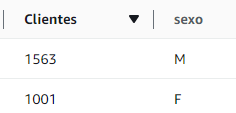

>Analisando graficamente a distribuição de clientes por sexo, temos a predominância de clientes do sexo masculino.Veja!

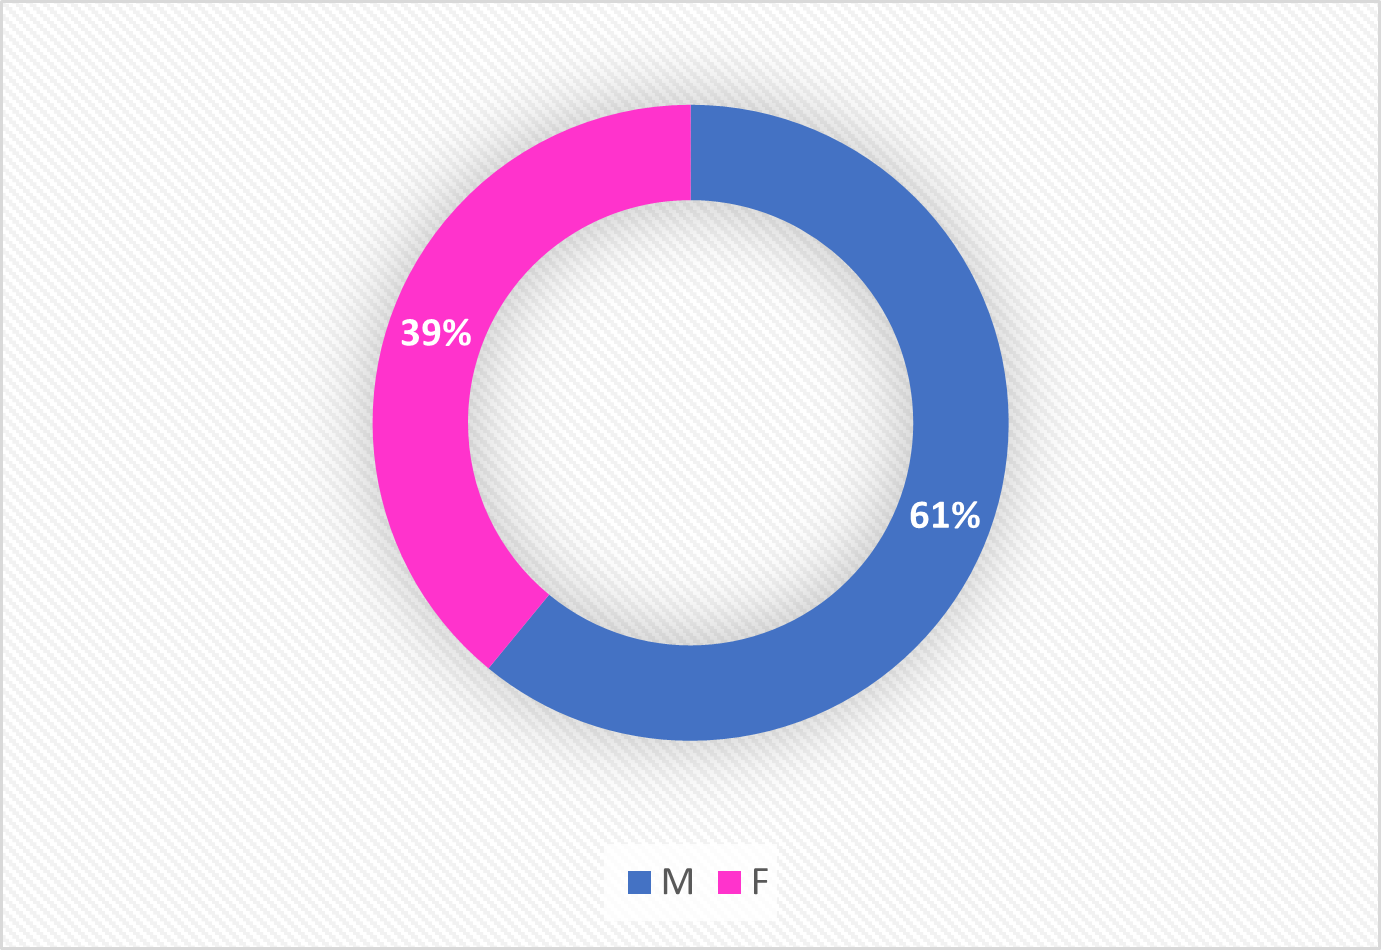


**Qual a maior e menor transação dos clientes?**

**Query**: select max(valor_transacoes_12m) as valor_max_transacoes,min(valor_transacoes_12m) as valor_min_transacoes from credito
>Resposta:

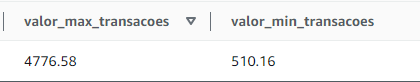

> Nesse banco de dados temos soma de transações em 12 meses variam de 510.16 a 4776.58

**O nível de escolaridade dos clientes possui alguma influência sobre o límite de crédito liberado?**

Antes de responder a pergunta feita, vamos dividir a média de limite de crédito em duas categorias sendo clientes com nível superior e clientes de nível médio e fundamental.

**Query**: SELECT avg(limite_credito) as media_credito,
escolaridade from credito
where escolaridade ='graduacao' or escolaridade='doutorado' or escolaridade='mestrado' 
group by escolaridade

>Resposta:

>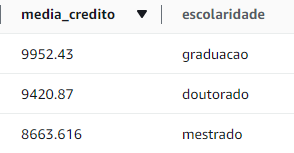

**Query**: SELECT avg(limite_credito) as media_credito,
escolaridade from credito
where escolaridade ='ensino medio' or escolaridade='sem educacao formal' 
group by escolaridade

>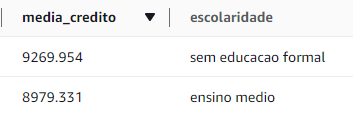

  >Percebemos que a média do maior limite de crédito de clientes com ensino superior e clientes com ensino médio ou fundamental varia apenas 3,24%, demonstrando baixa influência neste critério.Repare no gráfico abaixo a distribuição das transações de acordo com o nível de escolaridade.
  
  
>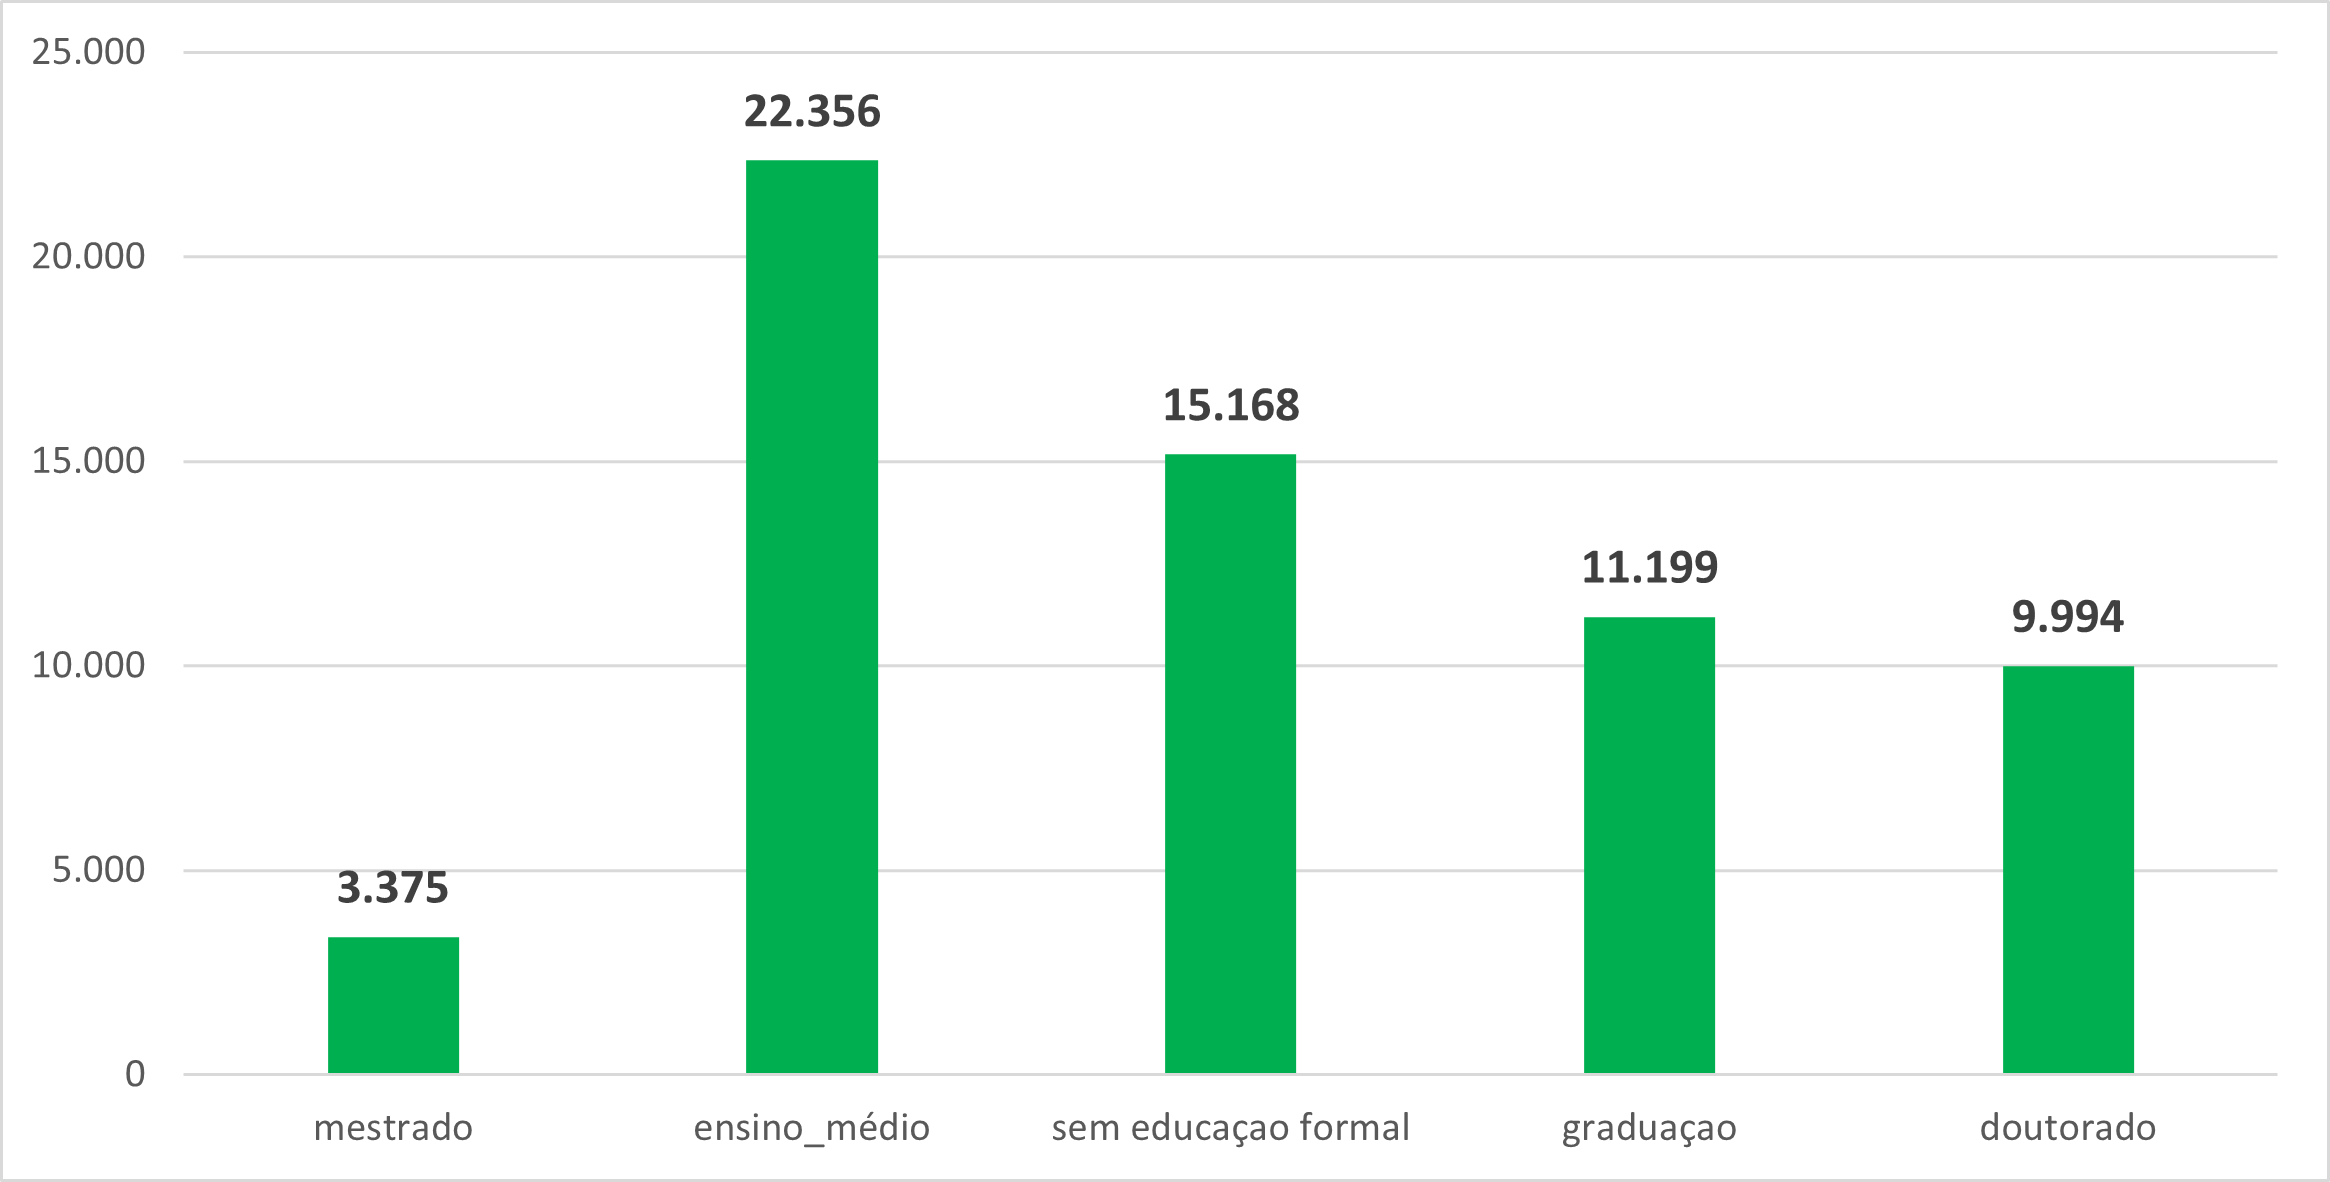

**Qual o perfil de renda da carteira de clientes presente na base de dados?**

**Query:** select count(*) as qtd_clientes,salario_anual
from credito salario_anual
where salario_anual!='na'
group by salario_anual
order by  count(*)  desc

>Resposta:

>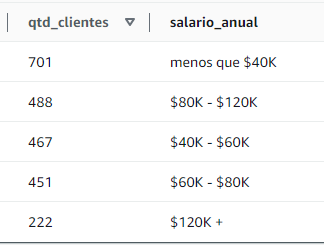

>Analisando graficamente:
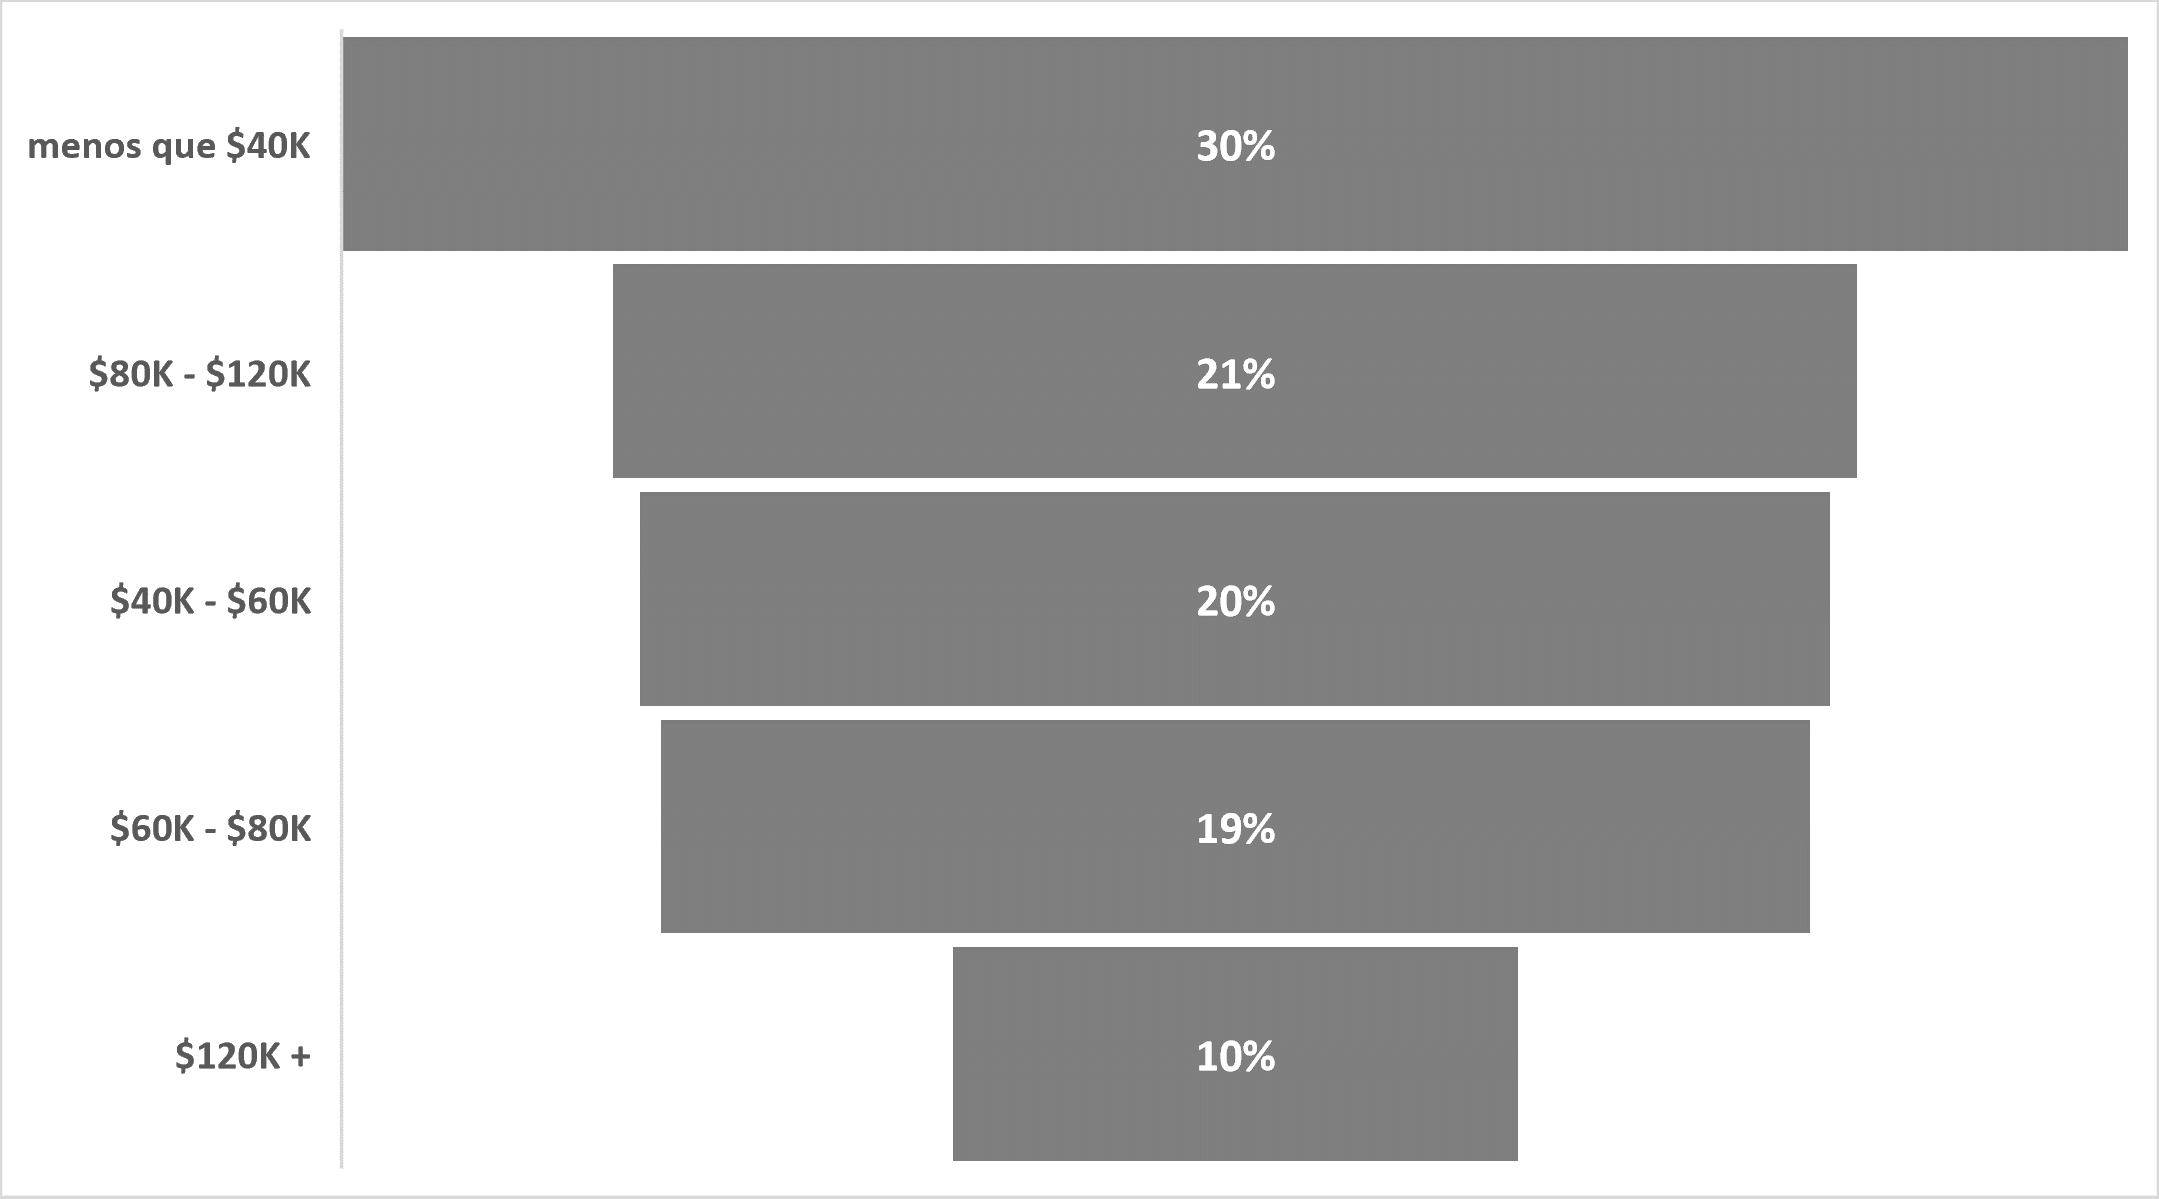

>Repare que mais da metade dos clientes estão presentes em duas faixas de renda, demonstrando uma leve concentração de renda na amostra.

**O salário impacta no limite de crédito?**

**Query:** select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite,  sexo,   salario_anual from credito 
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(valor_transacoes_12m) desc

>Resposta:
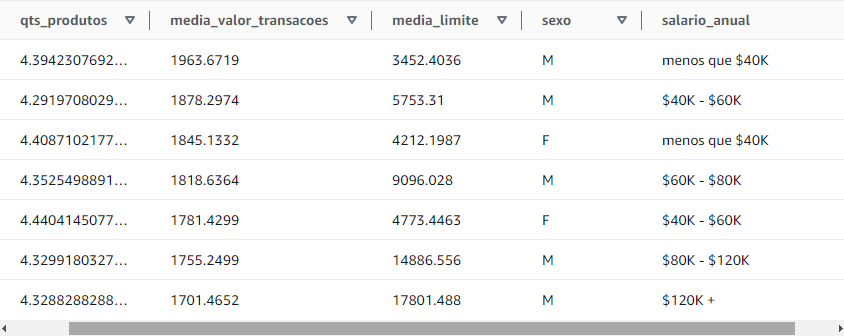
Analisando graficamente temos:
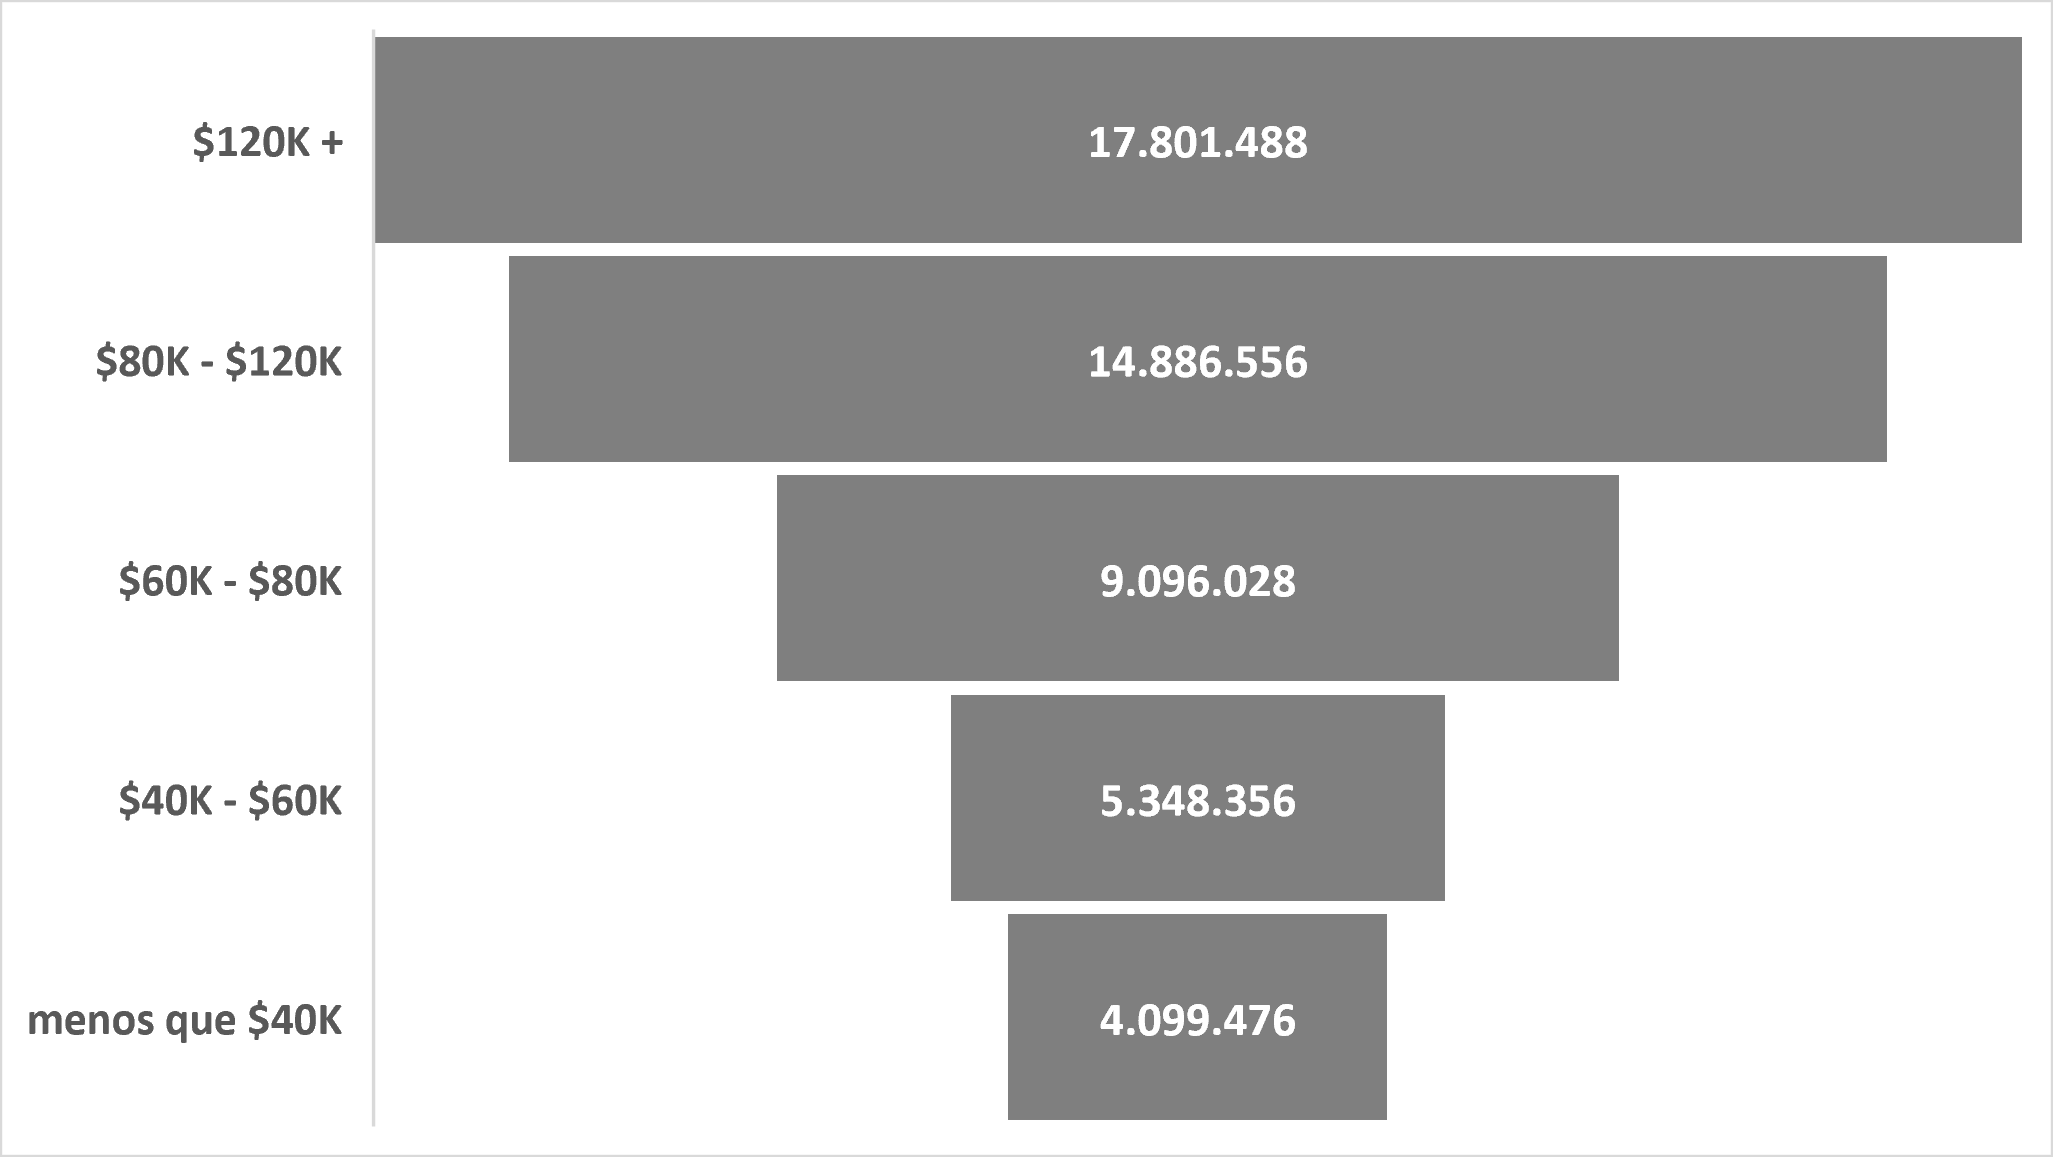
>SIM! As pessoas que tem menor faixa salarial também apresentam menor limite de credito!

**O tipo de cartão influência no limite de crédito?**

**Query:** select avg(limite_credito) as media_credito,tipo_cartao from credito group by tipo_cartao
>Resposta:

>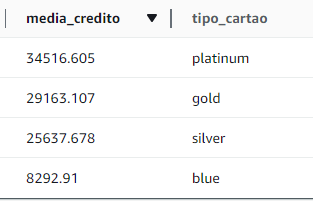

>Podemos notar que a média de limite varia de forma significativa de acordo com o produto disponível ao cliente.

**O sexo possui alguma inferencia sobre a liberação de crédito?**

**Query:** slect avg(limite_credito) as media_credito,sexo from credito group by sexo order by avg(limite_credito) desc

>Resposta: Se olharmos apenas o limite de crédito podemos dizer que sim, porém deve-se analisar a distribuição da renda por sexo, evitendo tendenciar o raciocínio analítico.

**Query**: select count(*) as cliente,salario_anual,sexo  from credito where salario_anual!='na'
group by sexo,salario_anual order by  salario_anual desc

>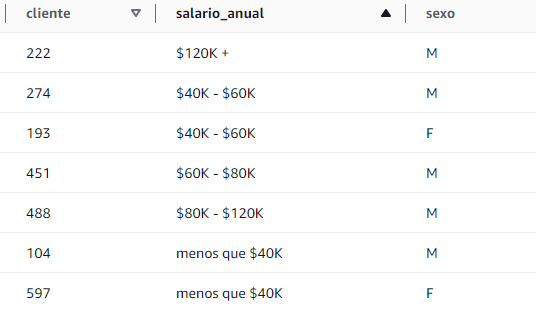


>Nota-se que os homens são detentores dos maiores níveis de renda, o que pode certamente afetar o crédito concedido as mulheres.

# Conclusão

Essas foram **algumas** análises extraídas do dataset de crédito.  

Alguns insights interessantes:

- a maior parte dos clientes possui renda até 40K 
- a maior parte dos clientes é masculino!
- a escolaridade não parece influenciar no limite nem no tipo do cartão
- os clientes com maiores limites são em sua maioria homens 
- os clientes com menores limites são em sua maioria mulheres
- Os cartões Platinum e Gold, possuem os maiores limites ofertados.
- a faixa salarial impacta diretamente no limite de crédito
- nao existem clientes com salário anual acima de 60K do sexo feminino